## Coursera Battle of the Neighborhoods Final Project

For this project, a client is interested in buying a house in the city of Seattle. The client is an avid car collector and the biggest ask for buying a house within Seattle is that the area has few or little car thefts. The objective is to find out which district within Seattle has the least amount of car thefts per year.

The data will come from the City of Seattle's Crime Dashboard and the data will consist of Motor Vehicle Theft statistics from the year 2020 (January - September). Coordinates of each crime location will be clustered on a map of Seattle to show where the most/lease crimes occur related to Motor Vehicle Theft. 

In [1]:
import pandas as pd
import requests
import numpy as np
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize  

from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
!pip install folium

     |████████████████████████████████| 93 kB 3.1 MB/s  eta 0:00:01


In [3]:
import folium

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_104bb34d55874c2aa58f7b7e46f020c9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='x',
    ibm_auth_endpoint="x",
    config=Config(signature_version='x'),
    endpoint_url='x')

body = client_104bb34d55874c2aa58f7b7e46f020c9.get_object(Bucket='x',Key='Table_Full_Data_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


SeaStat Category       SeaStat Offense  Year of Offense Start DateTime  \
0    Property Crime  Motor Vehicle Theft                            2020   
1    Property Crime  Motor Vehicle Theft                            2020   
2    Property Crime  Motor Vehicle Theft                            2020   
3    Property Crime  Motor Vehicle Theft                            2020   
4    Property Crime  Motor Vehicle Theft                            2020   

   Incomplete Year Beat      MCPP              Offense Offense Start DateTime  \
0  Incomplete Year   L1  LAKECITY  Motor Vehicle Theft    6/2/2020 9:30:00 PM   
1  Incomplete Year   L1  LAKECITY  Motor Vehicle Theft   6/3/2020 10:05:00 AM   
2  Incomplete Year   L1  LAKECITY  Motor Vehicle Theft   6/21/2020 7:00:00 PM   
3  Incomplete Year   L1  LAKECITY  Motor Vehicle Theft    1/6/2020 9:00:00 PM   
4  Incomplete Year   Q1   UNKNOWN  Motor Vehicle Theft  4/14/2020 12:00:00 PM   

  Precinct               100 Block Address  ...   Latitude   Longitude  \
0    North                             NaN  ...   0.000000    0.000000   
1    North                             NaN  ...   0.000000    0.000000   
2    North  24XX BLOCK OF NE NORTHGATE WAY  ...  47.709452 -122.301907   
3    North      115XX BLOCK OF 15TH AVE NE  ...  47.713073 -122.312464   
4     West                             NaN  ...   0.000000    0.000000   

  Map Boundaries Number of Records    St Area Sh st area sh (BEAT MAP.shp)  \
0        Polygon                 1  9.711400e+08              6.271607e+07   
1        Polygon                 1  9.711400e+08              6.271607e+07   
2        Polygon                 1  9.711400e+08              6.271607e+07   
3        Polygon                 1  9.711400e+08              6.271607e+07   
4            NaN                 1  3.903963e+08              1.860181e+08   

   st area sh (MCPP MAP.shp)      St Length st length  (BEAT MAP.shp)  \
0               8.589958e+07  135039.609019              34330.126417   
1               8.589958e+07  135039.609019              34330.126417   
2               8.589958e+07  135039.609019              34330.126417   
3               8.589958e+07  135039.609019              34330.126417   
4                        NaN  115256.614048              60395.098526   

  st length  (MCPP MAP.shp)  
0              44835.191812  
1              44835.191812  
2              44835.191812  
3              44835.191812  
4                       NaN  

[5 rows x 39 columns]

In [5]:
df_data_2.dropna(axis=0,how='any',subset=['Latitude','Longitude'],inplace=True)
df_data_2.head()

SeaStat Category       SeaStat Offense  Year of Offense Start DateTime  \
0    Property Crime  Motor Vehicle Theft                            2020   
1    Property Crime  Motor Vehicle Theft                            2020   
2    Property Crime  Motor Vehicle Theft                            2020   
3    Property Crime  Motor Vehicle Theft                            2020   
4    Property Crime  Motor Vehicle Theft                            2020   

   Incomplete Year Beat      MCPP              Offense Offense Start DateTime  \
0  Incomplete Year   L1  LAKECITY  Motor Vehicle Theft    6/2/2020 9:30:00 PM   
1  Incomplete Year   L1  LAKECITY  Motor Vehicle Theft   6/3/2020 10:05:00 AM   
2  Incomplete Year   L1  LAKECITY  Motor Vehicle Theft   6/21/2020 7:00:00 PM   
3  Incomplete Year   L1  LAKECITY  Motor Vehicle Theft    1/6/2020 9:00:00 PM   
4  Incomplete Year   Q1   UNKNOWN  Motor Vehicle Theft  4/14/2020 12:00:00 PM   

  Precinct               100 Block Address  ...   Latitude   Longitude  \
0    North                             NaN  ...   0.000000    0.000000   
1    North                             NaN  ...   0.000000    0.000000   
2    North  24XX BLOCK OF NE NORTHGATE WAY  ...  47.709452 -122.301907   
3    North      115XX BLOCK OF 15TH AVE NE  ...  47.713073 -122.312464   
4     West                             NaN  ...   0.000000    0.000000   

  Map Boundaries Number of Records    St Area Sh st area sh (BEAT MAP.shp)  \
0        Polygon                 1  9.711400e+08              6.271607e+07   
1        Polygon                 1  9.711400e+08              6.271607e+07   
2        Polygon                 1  9.711400e+08              6.271607e+07   
3        Polygon                 1  9.711400e+08              6.271607e+07   
4            NaN                 1  3.903963e+08              1.860181e+08   

   st area sh (MCPP MAP.shp)      St Length st length  (BEAT MAP.shp)  \
0               8.589958e+07  135039.609019              34330.126417   
1               8.589958e+07  135039.609019              34330.126417   
2               8.589958e+07  135039.609019              34330.126417   
3               8.589958e+07  135039.609019              34330.126417   
4                        NaN  115256.614048              60395.098526   

  st length  (MCPP MAP.shp)  
0              44835.191812  
1              44835.191812  
2              44835.191812  
3              44835.191812  
4                       NaN  

[5 rows x 39 columns]

## Now that the data has successfully been imported, a map will be generated to incorporate all GPS coordiinates into a map view. A heatmap will be produced to show where the most car thefts occur

In [6]:
map = folium.Map(location = [47.6062, -122.3321])
map

In [7]:
for lat, lng, MCPP, Neighborho in zip(
        df_data_2['Latitude'], 
        df_data_2['Longitude'], 
        df_data_2['MCPP'], 
        df_data_2['Neighborho']):
    label = '{}, {}'.format(Neighborho, MCPP)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
          [lat, lng],
        radius=2,
        popup=label,
        fill=True,
        fill_color='#YlGn',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 

map

In [8]:
import folium.plugins as plugins

location_data = df_data_2[['Latitude', 'Longitude']]
map.add_child(plugins.HeatMap(location_data, radius=20))

## The heatmap shows a large amount of car thefts within the inner parts of each district, but toward the outside of each district there are lower cases of car thefts. As there is a lot of data for the year, we are required to zoom in to see where red vs green areas are 

## Data will be shared with the customer to see which districts have the least amount of car thefts. This will help compare to the heatmap to determine where each district is located

In [9]:
df_data_2['MCPP'].value_counts()

BALLARD SOUTH                       159
NORTHGATE                           159
QUEEN ANNE                          152
UNIVERSITY                          144
CAPITOL HILL                        139
ROOSEVELT/RAVENNA                   122
NORTH BEACON HILL                   120
BRIGHTON/DUNLAP                     117
FREMONT                             107
UNKNOWN                              99
CENTRAL AREA/SQUIRE PARK             95
GREENWOOD                            94
LAKECITY                             92
MAGNOLIA                             92
BALLARD NORTH                        90
FIRST HILL                           89
BITTERLAKE                           85
SANDPOINT                            85
GEORGETOWN                           82
WALLINGFORD                          76
MORGAN                               66
ROXHILL/WESTWOOD/ARBOR HEIGHTS       62
SOUTH PARK                           59
SLU/CASCADE                          56
MID BEACON HILL                      55


North        1294
South         728
East          476
West          476
Southwest     461
UNKNOWN         2
Name: Precinct, dtype: int64

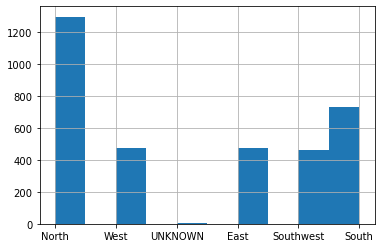

In [26]:
df_data_2['Precinct'].hist()
df_data_2['Precinct'].value_counts()

The data above shows that Southwest Precinct/area has the least amount of Car Thefts and North has the most. This data is according to where the car thefts occured. The Data below will be put into decending order to show where the last amount of Car Thefts occur

In [32]:
df_data_2['MCPP'].value_counts(ascending=True)

COMMERCIAL HARBOR ISLAND              1
EASTLAKE - EAST                       1
COMMERCIAL DUWAMISH                   3
PIGEON POINT                          4
GENESEE                              10
MADISON PARK                         12
SOUTH DELRIDGE                       12
ALKI                                 12
BELLTOWN                             16
PIONEER SQUARE                       17
LAKEWOOD/SEWARD PARK                 17
NEW HOLLY                            20
SOUTH BEACON HILL                    21
FAUNTLEROY SW                        21
MONTLAKE/PORTAGE BAY                 23
HILLMAN CITY                         28
EASTLAKE - WEST                      29
MILLER PARK                          31
RAINIER BEACH                        32
CLAREMONT/RAINIER VISTA              32
NORTH DELRIDGE                       33
SODO                                 34
HIGH POINT                           34
MADRONA/LESCHI                       34
NORTH ADMIRAL                        37


The following data will be shared with our client to provide areas within Seattle that have the least amount of Car Thefts. Places like Commerical Harbor Island and Commerical Duwamish will not be shared as this is related to commerical areas.